In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

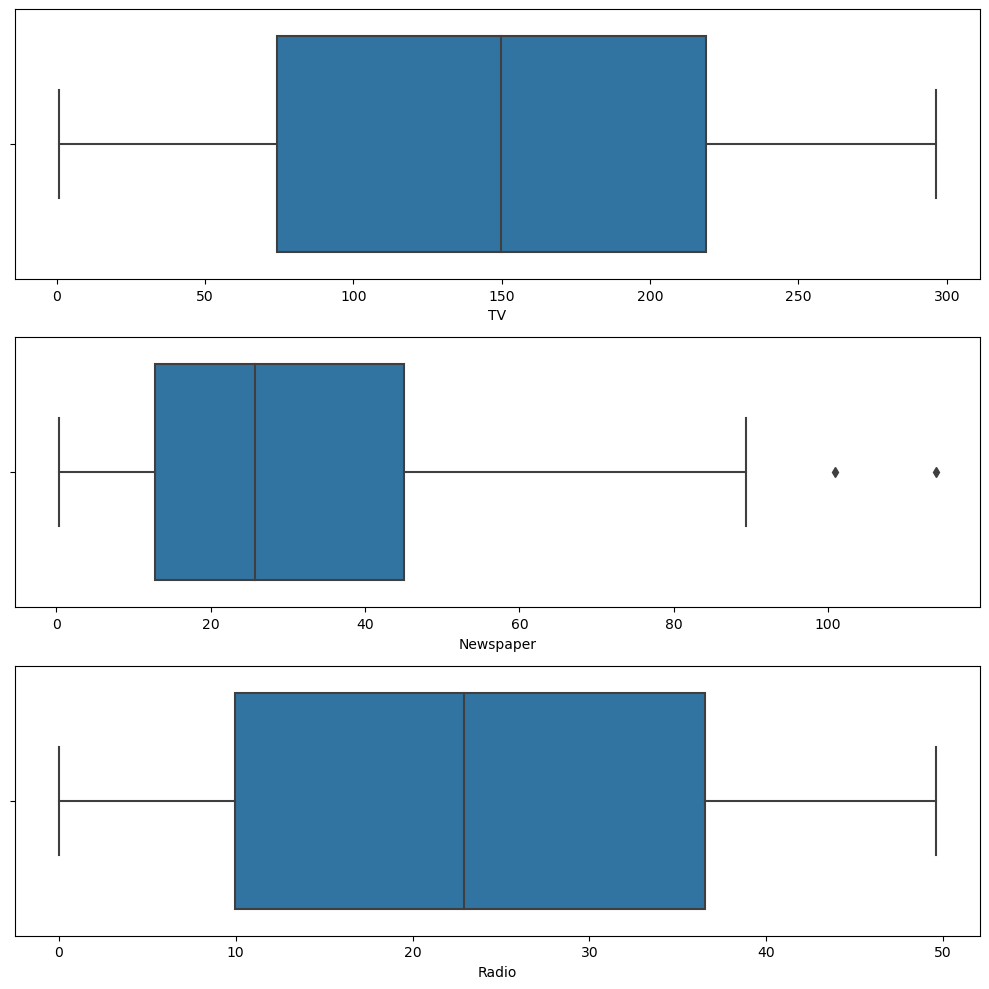

In [13]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

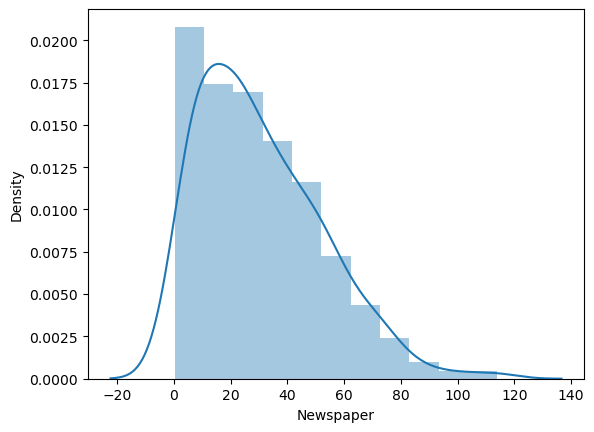

In [14]:
sns.distplot(df['Newspaper'])

In [15]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [16]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [17]:
data = df.copy()

In [18]:
data.loc[data['Newspaper']>=98, 'Newspaper']=98

<AxesSubplot:xlabel='Newspaper'>

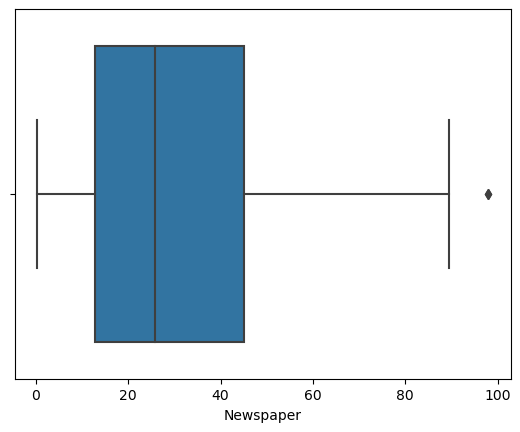

In [19]:
sns.boxplot(data['Newspaper'])

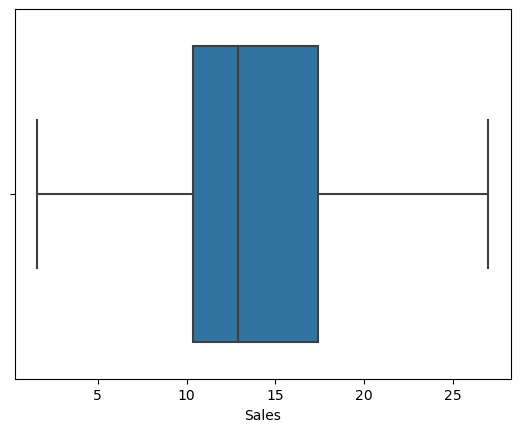

In [20]:
sns.boxplot(data['Sales']);

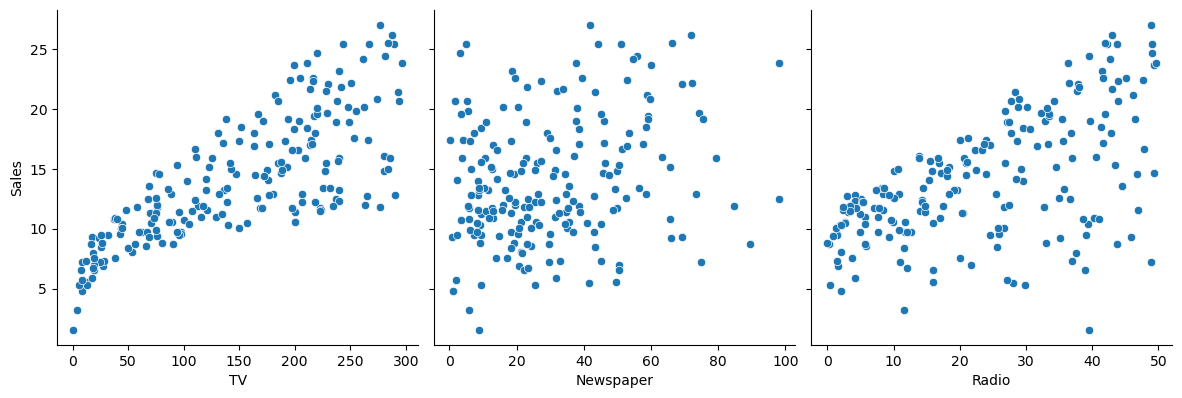

In [21]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

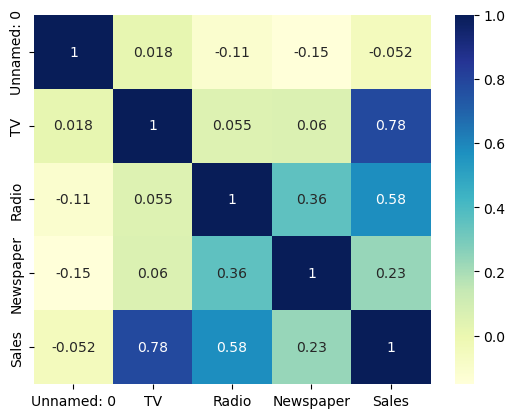

In [22]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [23]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [24]:
print(important_features)

['TV', 'Radio', 'Sales']


In [25]:
X = data['TV']
y = data['Sales']

In [26]:
X = X.values.reshape(-1,1)

In [27]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [28]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [29]:
print(X.shape,y.shape)

(200, 1) (200,)


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [31]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [32]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [34]:
knn_train_pred = knn.predict(X_train)

In [35]:
knn_test_pred = knn.predict(X_test)

In [36]:
print(knn_train_pred, knn_test_pred)

[15.56 10.36 13.04 15.   15.1  19.74  7.68 18.22 18.02  6.82 15.3  17.1
 14.9  16.66 18.02 10.36 17.1  21.3  22.48 12.34 14.2  12.34 15.62  7.64
  6.1  18.58 14.66 15.18 11.22 15.56 16.5  18.82 16.7  12.58 10.8  17.34
 20.4  10.5  15.18 10.12 16.3  18.22  9.94 19.36 20.86 21.3  14.5   5.7
  9.84 13.44  7.68 17.14  6.1  15.18 15.9  15.56 12.58 17.46  6.04 19.74
 16.66  4.9  14.5  12.34  9.44  9.98 12.34  7.68 15.18 12.58 14.54 12.9
 10.12 21.48  9.94 12.9  18.26  6.92 17.46  9.84  5.7  11.22 21.3  17.46
 15.14 21.3  10.2  19.74 14.2  16.7  15.    9.84 18.3   7.68 20.86  6.82
 13.34 12.7   7.64 10.54 18.5   9.94 15.1  11.22 10.54 14.06 17.46 10.8
 15.14 16.88 12.34 11.22 20.16 15.14 21.16 11.22 18.3  17.4  19.84  4.9
 15.14  9.94  7.64 15.56 14.9  12.74 10.48 14.5  10.2  11.22 20.4  10.56
 11.22 16.9 ] [16.2  14.98 17.46 10.92  9.44 10.54  7.68  9.84 10.54 19.36 10.54 13.86
 10.38 11.22 18.02 13.86 11.88 19.84 10.46  7.68 14.8   7.64 14.9   4.9
 16.66  6.92 14.9  17.32 20.4  16.2  15.18 

In [37]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [38]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5718505995203838
RMSE: 3.2894533026481816


In [39]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.638163,0.571851,3.289453,0.066313


In [40]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [41]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [42]:
print(svr_train_pred,svr_test_pred)

[18.09658756  8.5587706  12.08988673 17.34058574 13.69018481 18.5135464
  7.75161742 18.70570657 18.67956959  7.42924542 15.31538872 17.56342121
 14.34995184 15.58685411 18.67698565  8.56821917 17.59948228 18.56092001
 18.74372742 13.18869036 13.77673835 11.54674108 14.52225895  7.56240383
  7.34979138 16.56373159 14.0231523  15.22376164 10.82362381 18.06695113
 18.20638942 17.06900673 17.99454156 11.79523236 10.35135965 16.08824873
 18.7092837  10.85805305 14.96589016  8.82391815 15.86033336 18.72074564
  8.3284845  17.15256512 18.37110519 18.53875831 12.80454367  7.34698431
 11.19001218 13.04622056  7.75499539 17.21584215  7.35121557 14.93572678
 17.41601896 18.08553445 11.68073043 17.69249697  7.40025034 18.44086226
 15.61257966  7.31157716 12.95611925 13.19344429 11.04410114 11.34478891
 13.20295317  7.83892402 15.03137144 11.79523236 16.47111801 13.28859827
  8.74088311 18.69689641  8.27072202 13.36483346 15.97423836  7.51296438
 16.76302487 11.11715908  7.33253586 10.10429601 18.

In [43]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5852853317163573
RMSE: 3.2374327340551896


In [44]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.638163,0.571851,3.289453,0.066313
1,Support Vector Machine,0.595626,0.585285,3.237433,0.010341


In [45]:
import statsmodels.api as sm

In [46]:
X_train_constant = sm.add_constant(X_train)

In [47]:
model = sm.OLS(y_train, X_train_constant).fit()

In [48]:
model.params

const    6.760668
x1       0.048058
dtype: float64

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     208.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           6.27e-29
Time:                        14:57:15   Log-Likelihood:                -349.83
No. Observations:                 134   AIC:                             703.7
Df Residuals:                     132   BIC:                             709.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7607      0.574     11.783      0.0

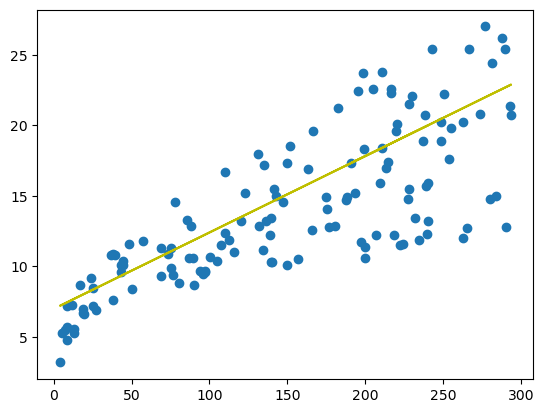

In [50]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [51]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

27    -2.399382
1      1.500753
79    -1.335390
174   -5.948756
194    3.345057
         ...   
161    2.420765
175    6.932085
140    0.611878
117   -1.032296
187    1.355457
Name: Sales, Length: 134, dtype: float64

In [52]:
y_train_pred

array([18.2993821 ,  8.89924695, 12.33539042, 17.44875637, 13.95494336,
       18.95777603,  7.96211691, 19.50563666, 19.39510338,  7.3950331 ,
       15.53604994, 17.67943454, 14.60853149, 15.79075708, 19.38549179,
        8.90885854, 17.7178809 , 20.68305645, 19.91412924, 13.45033488,
       14.04144767, 11.78752979, 14.77673432,  7.66415762,  7.17396652,
       16.69905234, 14.28654322, 15.44954563, 11.07146632, 18.26093574,
       18.44836175, 17.17963185, 18.16962563, 12.03743113, 10.61491579,
       16.2569192 , 20.22650592, 11.10510689, 15.20445008,  9.16356568,
       16.04546422, 19.58733518,  8.6589572 , 17.26133037, 18.69826309,
       20.73111441, 13.06106548,  7.16435493, 11.43190095, 13.30616103,
        7.96692271, 17.3238057 ,  7.17877232, 15.17561531, 17.5256491 ,
       18.28496472, 11.92209205, 17.8188026 ,  7.32294617, 18.81840797,
       15.81478605,  7.02018108, 13.21485092, 13.45514067, 11.2877271 ,
       11.58568639, 13.46475226,  8.08226179, 15.26692541, 12.03

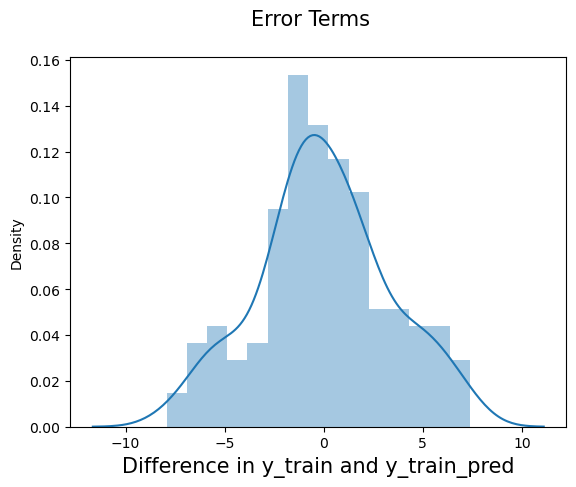

In [53]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

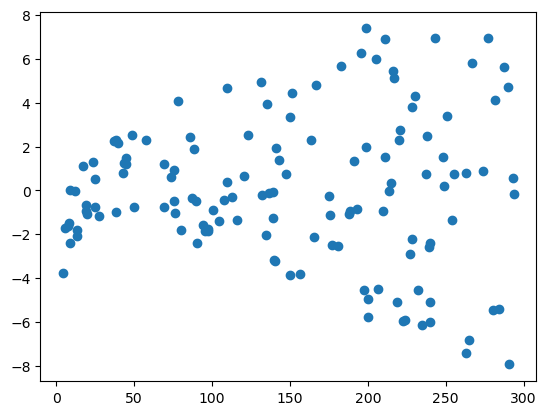

In [54]:
plt.scatter(X_train, res)
plt.show()

In [55]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [56]:
X_test_constant

array([[  1. , 184.9],
       [  1. , 225.8],
       [  1. , 229.5],
       [  1. ,  66.1],
       [  1. ,  93.9],
       [  1. ,  66.9],
       [  1. ,  25.6],
       [  1. ,  96.2],
       [  1. ,  70.6],
       [  1. , 217.7],
       [  1. ,  68.4],
       [  1. , 120.5],
       [  1. , 102.7],
       [  1. ,  76.3],
       [  1. , 261.3],
       [  1. , 121. ],
       [  1. , 137.9],
       [  1. , 213.5],
       [  1. ,  53.5],
       [  1. ,  26.8],
       [  1. , 172.5],
       [  1. ,  19.6],
       [  1. , 129.4],
       [  1. ,   0.7],
       [  1. , 187.8],
       [  1. ,  17.2],
       [  1. , 163.5],
       [  1. , 202.5],
       [  1. , 276.7],
       [  1. , 184.9],
       [  1. , 177. ],
       [  1. , 171.3],
       [  1. , 206.9],
       [  1. , 296.4],
       [  1. , 204.1],
       [  1. , 237.4],
       [  1. ,  17.2],
       [  1. , 193.7],
       [  1. , 197.6],
       [  1. ,  75.1],
       [  1. , 215.4],
       [  1. ,  59.6],
       [  1. , 241.7],
       [  1

In [57]:
y_pred

array([15.64658323, 17.61215341, 17.78996782,  9.93729869, 11.27330971,
        9.97574505,  7.99095168, 11.383843  , 10.15355946, 17.22288401,
       10.04783197, 12.5516512 , 11.69621968, 10.42748978, 19.31821066,
       12.57568018, 13.38785954, 17.02104061,  9.33176851,  8.04862123,
       15.05066464,  7.70260398, 12.97936696,  6.79430871, 15.78595128,
        7.5872649 , 14.61814308, 16.49240316, 20.0583031 , 15.64658323,
       15.26692541, 14.9929951 , 16.70385814, 21.00504472, 16.56929588,
       18.16962563,  7.5872649 , 16.06949319, 16.2569192 , 10.36982024,
       17.11235072,  9.62492201, 18.37627482,  8.27449359,  7.13552016,
       17.34783468, 19.52485984, 10.43229558,  9.75467847, 20.2505349 ,
       14.85362704,  9.46152497,  8.13512554, 17.25652457, 17.44875637,
        7.62090546, 18.28977051, 12.80155255, 20.38990296, 10.35059706,
       10.0189972 , 14.94013135, 20.50524204, 14.66620103, 12.39305997,
       12.08068329])

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.1566318705797207

In [60]:
r2 = r2_score(y_test, y_pred)

In [61]:
r2

0.6057281567267774

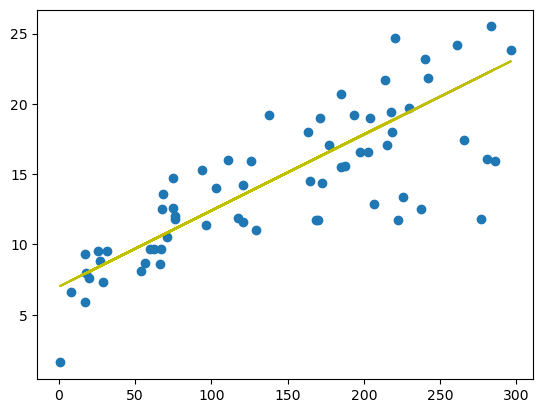

In [62]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()